<h1 style="text-align: center; vertical-align: middle;">Numerical Methods in Accelerator Physics</h1>
<h2 style="text-align: center; vertical-align: middle;">Python examples -- Week 4</h2>

<h2>Run this first!</h2>

Imports and modules:

In [4]:
from config4 import np, plt, plot_rfwave
from scipy.constants import m_p, e, c
%matplotlib inline

<h3>Numerical artefacts: drastic example of truncation error (slide 8)</h3>

<p>In order to show the effect of truncation errors in the following, we divide 10 by 9 resulting in 1.11...<br />
By using the function workdps() of the library mpmath we limit the precision to 7 digits after the decimal point. In the nth row, $10^{-n}$ (the first digit) is substracted. Beginning in the 9th line (8th digit after the decimal point), the numbers are purely random due to truncation errors.</p>

In [2]:
import mpmath as mp

with mp.workdps(7):
    x = mp.mpf(10) / 9   # == 1.11...
    
    for _ in range(30):
        print (x)
        x = (x - 1) * 10

1.111111
1.111111
1.11111
1.111104
1.111045
1.110449
1.104488
1.044884
0.4488373
-5.511627
-65.11627
-661.1627
-6621.627
-66226.27
-662272.7
-6622737.0
-6.622738e+7
-6.622738e+8
-6.622738e+9
-6.622738e+10
-6.622738e+11
-6.622738e+12
-6.622738e+13
-6.622738e+14
-6.622738e+15
-6.622738e+16
-6.622738e+17
-6.622738e+18
-6.622738e+19
-6.622738e+20


<h3>RF cavity - Phase focusing effect (slide 23)</h3>

<p>Passing a cavity, a particle changes its energy compared to the synchronous particle by<br />
$\left.\Delta E\right|_{\textrm{after}}=\left.\Delta E\right|_{\textrm{before}}+qV\cdot\left(\sin\left(\varphi_s-\frac{\omega_\textrm{rf}z}{\beta c}\right)-\sin\left(\varphi_s\right)\right)$.<br />
The function plot_rfwave() plots this energy change as a function of the phase. The default synchronous phase is $\varphi_s=0.5\,\textrm{rad}$. A particle with smaller phase arrives earlier then the one with larger phase. At the same time an energy gain larger then the other (synchronous) particle leads to a velocity increase and the corresponding particle will arrive earlier (at smaller phase) at the next turn. In this example the yellow, earlier particle looses energy compared to the synchronous particle. It will be slower and reduces the distance to the synchronous particle. The blue, later particle, however, gains energy compared to the synchronous particle. It will be faster and also reduces the distance to the synchronous particle $\Rightarrow$ phase focusing</p>

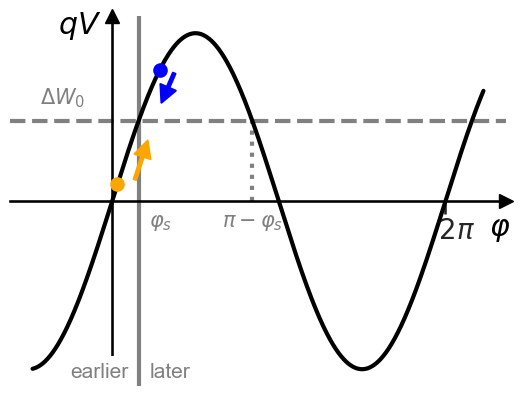

In [5]:
plot_rfwave();

<h3>Transition energy (slide 37)</h3>

<p>Taking the phase slip factor $\eta$ into account, the longitudinal one-turn map of a synchrotron is given by<br />
$z_{n+1}=z_n-\eta C\left(\frac{\Delta p}{p_0}\right)$<br />
$\left(\Delta p\right)_{n+1}=\left(\Delta p\right)_n+\frac{qV}{\left(\beta c\right)_n}\left(\sin\left(\varphi_s-\frac{2\pi}{C}\cdot hz_{n+1}\right)-\sin\left(\varphi_s\right)\right)$<br />
Thus, the phase focusing effect depends on the sign of $\eta$, which is $\eta < 0$ if the energy of the particles is below the transition energy $\gamma<\gamma_t$ and $\eta > 0$ if $\gamma>\gamma_t$. In the function plot_rfwave(), these cases are implemented as "regime='classical'" and "regime='relativistic'", respectively.</p>

<p>Phase focusing for $\gamma<\gamma_\text{t} \Rightarrow \eta<0$ at $\varphi_s=0.5$:</p>

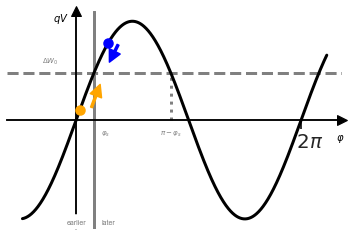

In [3]:
plot_rfwave(phi_s=0.5, regime='classical');

<p>Defocusing for $\gamma<\gamma_\text{t} \Rightarrow \eta<0$ at $\varphi_s=\pi-0.5$:</p>

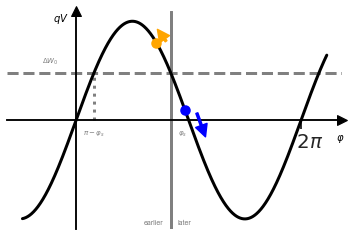

In [4]:
plot_rfwave(phi_s=np.pi-0.5, regime='classical');

<p>Defocusing for $\gamma>\gamma_\text{t} \Rightarrow \eta>0$ at $\varphi_s=0.5$:</p>

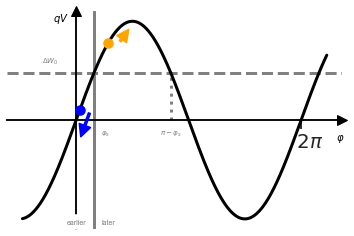

In [5]:
plot_rfwave(phi_s=0.5, regime='relativistic');

<p>Phase focusing for $\gamma>\gamma_\text{t} \Rightarrow \eta>0$ at $\varphi_s=\pi-0.5$:</p>

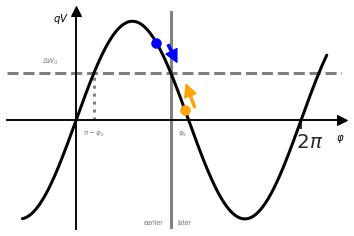

In [6]:
plot_rfwave(phi_s=np.pi-0.5, regime='relativistic');